In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
### Fetching the MNIST Dataset 

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
### 'data' is an array of data with 1 row per instance and one column per feature
### 'target' is the label

x, y = mnist['data'], mnist['target']
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [30]:
### There are 70,000 images of digits and each image has 784 features as it is a 28 x 28 pixels image.
### Whereas each number determines one pixel intensity of black. (white 0 to black 255).

some_number = x[7]
some_number



array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

some_number_image = some_number.reshape(28,28)

plt.imshow(some_number_image, cmap='binary')

In [31]:
y[7]

3

In [7]:
### Indeed it is a 2. But note the arrays of y are stored as a string. So lets convert it to an int.

y = y.astype(np.uint8)

In [32]:
y[7]

3

## Training and Test Set

In [9]:
### The MNIST dataset has already split into training and testing set for us, which it is already shuffled and the first 60,000
### instances should be used as a training set and the rest as a testing set. 

x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]

## Training a Binary Classifier

In [10]:
### With this we can train a model to identify whether it is that certain digit or not. For instance, whether it is a 3 or not.
### It then returns a true or false boolean.

y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3) 

### This returns an array of True for all 3s, False for all other digit

### Using Stochastic Gradient Descent (SGD) classifier

In [11]:
## Note: SGD is similar to GD. It computes gradients, intercepts and a regression however can be used as a classifier as well, as most regression do.
## SGD is more computationally efficient than gradient descent when you have much larger datasets. SGD is also really good when
## you have a lot of attributes or parameters.
## for more information, watch a YouTube video: https://www.youtube.com/watch?v=vMh0zPT0tLI

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=47)
sgd_clf.fit(x_train, y_train_3)

SGDClassifier(random_state=47)

In [33]:
sgd_clf.predict([some_number])

array([ True])

In [34]:
y[7]

3

In [13]:
sgd_clf.predict([x[7]])

array([ True])

In [14]:
y[7]

3

## Performance Measure 

### - Measuring Accuracy using Cross-Validation 

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_3, cv=3, scoring="accuracy")

array([0.96775, 0.95135, 0.95795])

In [16]:
### To show that whether this performance measure is credible or not, we can map all of the x_train label as false or 0. Then 
## see how accurate it would get. If it is a high percentage, then that means the labels of 'true' is much much less than the
## labels of 'false'. Essentially, you have a high percentage of getting the answer right although, you are justing saying all of them
## are false.

from sklearn.base import BaseEstimator  

class AlwaysNever3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
never_3_clf = AlwaysNever3Classifier()
cross_val_score(never_3_clf, x_train, y_train_3, cv=3, scoring="accuracy")

array([0.8962 , 0.89975, 0.8975 ])

In [17]:
### So essentially 89% to 90% of this whole data are non-3s. So measuing accuracy is generally not the preferred performance
### measure for classifiers, especially when dealing with skewed datasets (ie: when some classes are much more frequent than othes).

### - Confusion Matrix

In [18]:
### Before computing the confusion matrix, we need a set of predictions so it can be compared with the actual labels.

In [19]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3)

In [20]:
### The cross_val_predict() method performs K-fold cross-validation, but instead of returning the evaluation scores, it returns prediction
### made on each test fold. This means that you can get a clean prediction for each instance in the training set.
### Note: Clean = prediction made by the model that never saw the data during training.



In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_3, y_train_pred)

array([[52427,  1442],
       [ 1017,  5114]], dtype=int64)

In [22]:
### To understand what is being displayed, check 'Confusion-matrix-for-binary-classification' in the media and notes folder.

In [23]:
### We have 2 measures: Precision & Recall.
### Check in the media and notes folder.

### - Precision and Recall

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_3, y_train_pred) # == 5114 / (1442 + 5114)

0.7800488102501525

In [25]:
recall_score(y_train_3, y_train_pred) # == 5114 / (1017 + 5114)

0.8341216767248409

In [26]:
## - Precision is the score representing out of all the time when the model claims the digit as 3, 78% of it is correct. 
## - Recall is the score representing out all the 3s, it detects 83% of them.
## - F1 score is a score combining both measures above. Formula is in the M&N folder. It is a harmonic mean. Rather than treating
## the values equally, it gives much more weight to low values. So it can only have a bigger value when BOTH measures is high.

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.8061795538740444

In [28]:
## - F1 score favors classifiers that have similar precision and recall. This is not always the case: sometimes you would care
## more about the precision and sometimes more about the recall. 

## - Eg.1: You would prefer a higher precision model if you are using the model for detecting safe videos for kids. 

## - Eg.2: You would prefer a higher recall model if you are using to detect shop-lifting (sure they can get more false-alarm but
##         But it is better than missing an actual shop-lifting activity.)

## You can't have both at high. This is called the precision/recall trade-off.

## Precision and Recall Trade-off

In [35]:
y_scores = sgd_clf.decision_function([some_number])
y_scores

array([5014.18518579])

In [36]:
## the decision funtion returns a score for each instance, then use it to compare with the threshold to predict whether positive
## or negative

In [40]:
## if the threshold is at 0, then the prediction would say the some_number is a 3. (which is true)

threshold = 0
y_some_number_pred = (y_scores > threshold)
y_some_number_pred

array([ True])

In [41]:
## if we increase the threshold to 8000, then the prediction would say some_number isn't a 3. 

threshold = 8000
y_some_number_pred = (y_scores > threshold)
y_some_number_pred

array([False])

In [42]:
## This show us that when we increase the threshold, the recall score decreases (ie: higher false negative rate).

## So how do we know which threshold to use?

In [46]:
## first use cross_val_predict

y_scores = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3, method='decision_function')

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

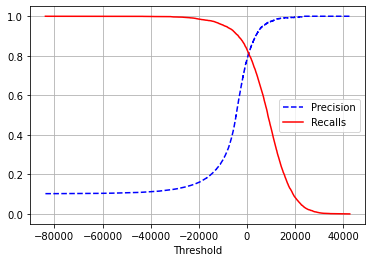

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r-", label="Recalls")
    plt.legend()
    plt.xlabel('Threshold')
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()